In [493]:
#SQL DATABASES TAKES FOREVER TO LOAD THIS DMAN THING 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
import matplotlib.font_manager as font_manager
import numpy as np
import scipy.stats as stats


In [89]:
all_merged = pd.read_csv('/Users/carlosgovea/Documents/Flatiron/DSNYC103122/Phase-1-project-template/zippedData/all_merged.csv')

In [228]:
foreign_gb = all_merged.groupby(['year','foreign_gross']).mean()
domestic_gb = all_merged.groupby(['year','domestic_gross']).mean()
all_merged = all_merged[all_merged['foreign_gross'].notna()]

In [229]:
#foreign_gb.drop(['domestic_gross','id','production_budget','worldwide_gross','release_year','popularity','runtime_minutes','profit','profit_rate'],axis=1,inplace=True)
#domestic_gb.drop(['foreign_gross','id','production_budget','worldwide_gross','release_year','popularity','runtime_minutes','profit','profit_rate'],axis=1, inplace=True)

share_distribution= all_merged[['foreign_gross','domestic_gross','year']]

In [231]:
foreign_share_distribution = share_distribution.groupby(['year'])['foreign_gross'].mean()

In [582]:
foreign_share_distribution.min()

82856006.11656442

In [233]:
domestic_share_distribution = share_distribution.groupby(['year'])['domestic_gross'].mean()
domestic_share_distribution

year
2010    5.380062e+07
2011    5.495173e+07
2012    6.487728e+07
2013    7.496527e+07
2014    7.745431e+07
2015    6.703345e+07
2016    7.203365e+07
2017    7.997205e+07
2018    7.811650e+07
Name: domestic_gross, dtype: float64

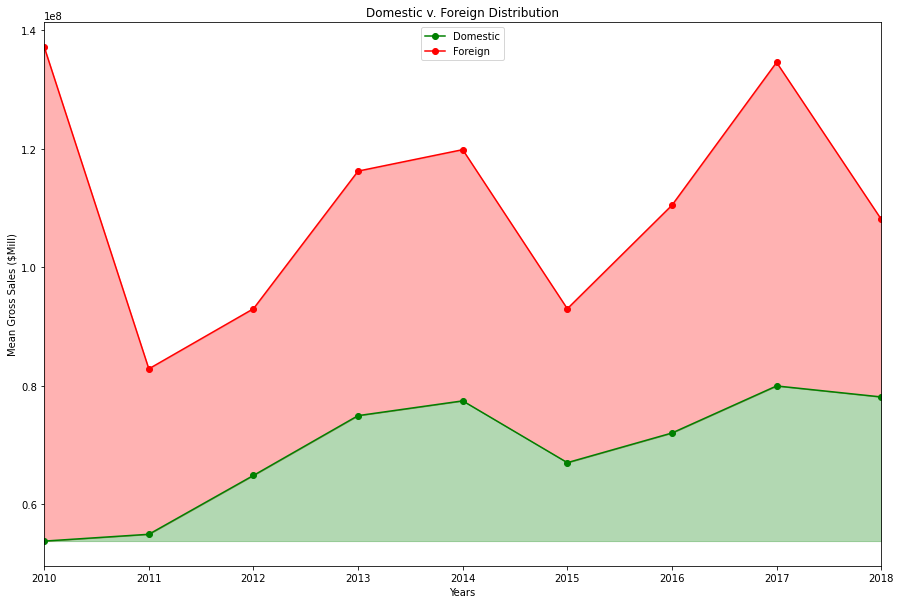

In [586]:
data_range = range(2010,2018)


ax = domestic_share_distribution.plot(marker='o',label='Domestic',color='green')
foreign_share_distribution.plot(ax=ax, marker='o',label='Foreign',color="red")
ax.set_title('Domestic v. Foreign Distribution')
ax.set_xlabel('Years')
ax.set_ylabel('Mean Gross Sales ($Mill)')
leg = ax.legend(loc='upper center')
ax.fill_between(domestic_share_distribution.index, foreign_share_distribution.values, 
                domestic_share_distribution.values, alpha = 0.3, color = 'red')
ax.fill_between(domestic_share_distribution.index, domestic_share_distribution.values,
               min(domestic_share_distribution.values), alpha =0.3, color ='green')
ax.set_xlim(2010,2018)
plt.rcParams["figure.figsize"] = (15,10)

plt.savefig("1A_DFD.jpg")

In [299]:
domestic_share_distribution.values

array([53800625.        , 54951733.90797546, 64877279.0075188 ,
       74965269.28148147, 77454309.21008404, 67033454.7254902 ,
       72033654.5909091 , 79972052.26785715, 78116496.5462963 ])

In [205]:
all_merged


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,studio,foreign_gross,year,genre_ids,popularity,movie_id,runtime_minutes,genres,profit,profit_rate
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,804600000.0,2011,"[12, 28, 14]",30.579,tt1298650,136.0,"Action,Adventure,Fantasy",6.350639e+08,154.667286
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,946400000.0,2015,"[28, 12, 878]",44.383,tt2395427,141.0,"Action,Adventure,Sci-Fi",1.072414e+09,324.384139
2,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018,BV,NaN,2018,"[12, 28, 14]",80.773,tt4154756,149.0,"Action,Adventure,Sci-Fi",1.748134e+09,582.711400
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,WB,428900000.0,2017,"[28, 12, 14, 878]",34.953,tt0974015,120.0,"Action,Adventure,Fantasy",3.559452e+08,118.648403
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Sony,680600000.0,2015,"[28, 12, 80]",30.318,tt2379713,148.0,"Action,Adventure,Thriller",5.796209e+08,193.206974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,FoxS,456000.0,2011,"[18, 878]",10.030,tt1549572,92.0,"Drama,Romance,Sci-Fi",1.927779e+06,1101.588000
1262,68,2012-04-27,Sound of My Voice,135000.0,408015.0,4.294480e+05,2012,FoxS,NaN,2012,"[878, 18, 9648, 53]",7.212,tt1748207,85.0,"Drama,Mystery,Sci-Fi",2.944480e+05,218.109630
1263,73,2012-06-15,Your Sister's Sister,120000.0,1597486.0,3.090593e+06,2012,IFC,NaN,2012,"[18, 35]",7.115,tt1742336,90.0,"Comedy,Drama",2.970593e+06,2475.494167
1264,80,2015-07-10,The Gallows,100000.0,22764410.0,4.165647e+07,2015,WB (NL),20200000.0,2015,"[27, 53]",9.166,tt2309260,81.0,"Horror,Mystery,Thriller",4.155647e+07,41556.474000


In [235]:
genre_list= list(set(all_merged['genres'].dropna().values))


In [293]:
unique_genre_list =[]
for genre in genre_list:
    for i in genre.split(','):
        unique_genre_list.append(i)

In [296]:
unique_genre_list = set(unique_genre_list)
unique_genre_list

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [339]:
all_merged['profitability'] =pd.qcut(all_merged['profit_rate'], q=3, labels=['Low','Moderate','High'])

<ipython-input-339-6388a2e70f92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_merged['profitability'] =pd.qcut(all_merged['profit_rate'], q=3, labels=['Low','Moderate','High'])


In [521]:
all_merged['profitability'].explode('studio').value_counts()

High        354
Moderate    354
Low         354
Name: profitability, dtype: int64

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,studio,foreign_gross,year,genre_ids,popularity,movie_id,runtime_minutes,genres,profit,profit_rate,profitability
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,BV,804600000.0,2011,"[12, 28, 14]",30.579,tt1298650,136.0,"Action,Adventure,Fantasy",6.350639e+08,154.667286,Moderate
1,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,BV,946400000.0,2015,"[28, 12, 878]",44.383,tt2395427,141.0,"Action,Adventure,Sci-Fi",1.072414e+09,324.384139,High
3,9,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,2017,WB,428900000.0,2017,"[28, 12, 14, 878]",34.953,tt0974015,120.0,"Action,Adventure,Fantasy",3.559452e+08,118.648403,Moderate
4,10,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,2015,Sony,680600000.0,2015,"[28, 12, 80]",30.318,tt2379713,148.0,"Action,Adventure,Thriller",5.796209e+08,193.206974,Moderate
5,11,2012-07-20,The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2012,WB,636800000.0,2012,"[28, 80, 18, 53]",26.220,tt1345836,164.0,"Action,Thriller",8.094391e+08,294.341491,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,70,2012-02-03,Kill List,800000.0,29063.0,4.622060e+05,2012,IFC,143000.0,2012,"[27, 53, 80]",7.036,tt1788391,95.0,"Crime,Drama,Horror",-3.377940e+05,-42.224250,Low
1258,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt1758692,86.0,"Drama,Romance",3.478400e+06,1391.360000,High
1259,74,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,2011,ParV,336000.0,2011,"[18, 10749]",10.091,tt4621872,116.0,"Comedy,Drama",3.478400e+06,1391.360000,High
1261,48,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,2011,FoxS,456000.0,2011,"[18, 878]",10.030,tt1549572,92.0,"Drama,Romance,Sci-Fi",1.927779e+06,1101.588000,High


In [442]:
top_profitable= all_merged.loc[all_merged['profitability']=='High',:]

In [458]:
#top_profitable.explode(list('studio'))
studio_list = list(set(all_merged['studio'].dropna().values))
unique_studio_list =[]
for studio in studio_list:
     unique_studio_list.append(studio)

In [517]:
all_merged['studio'].value_counts()

Uni.           141
Fox            111
WB              92
BV              70
Par.            68
Sony            68
LGF             49
WB (NL)         48
Wein.           48
Focus           42
FoxS            34
Rela.           29
LG/S            25
RAtt.           23
ORF             22
SGem            20
STX             19
TriS            16
IFC             15
SPC             13
A24             11
CBS              7
FD               7
Sum.             7
P/DW             6
MNE              6
W/Dim.           5
Studio 8         5
Annapurna        5
FCW              4
BST              4
RTWC             4
EC               3
BH Tilt          3
EOne             3
Magn.            3
ParV             3
PFR              2
Affirm           2
BG               2
Strand           2
CE               1
OMNI/FSR         1
Neon             1
GrtIndia         1
LD               1
VE               1
UTV              1
P4               1
MBox             1
Amazon           1
MGM              1
Jan.        

In [560]:
top_studio_profit= top_profitable.groupby(['studio']).sum().sort_values(by='popularity',ascending=False)

In [561]:
top_10_per_studios =top_studio_profit.head(10)
top_10_per_studios

,id,production_budget,domestic_gross,worldwide_gross,release_year,foreign_gross,year,popularity,runtime_minutes,profit,profit_rate
studio,,,,,,,,,,,
Uni.,3737,1.797500e+09,7.978539e+09,1.855881e+10,137032,1.054360e+10,137032,877.181,6574.0,1.676131e+10,109864.885395
BV,1662,5.212600e+09,1.046563e+10,2.698363e+10,66491,1.662450e+10,66491,692.902,3626.0,2.177103e+10,13928.216482
Fox,1506,2.185000e+09,4.397605e+09,1.293893e+10,62429,8.595300e+09,62429,613.893,3435.0,1.075393e+10,16577.284433
Par.,998,8.350000e+08,2.039651e+09,5.096752e+09,38264,3.104600e+09,38264,328.993,2021.0,4.261752e+09,29675.312537
Sony,1090,1.246000e+09,2.884073e+09,7.431366e+09,36260,4.506800e+09,36260,315.672,1913.0,6.185366e+09,9721.955156
WB (NL),1080,8.146000e+08,2.353795e+09,5.458351e+09,40292,3.154600e+09,40292,315.576,2086.0,4.643751e+09,64787.659876
WB,923,1.379000e+09,3.765076e+09,8.131795e+09,38278,4.406400e+09,38278,297.879,2045.0,6.752795e+09,15328.432055
Wein.,1171,3.079000e+08,9.417646e+08,2.372658e+09,38257,1.419000e+09,38256,271.479,1880.0,2.064758e+09,15838.281594
FoxS,607,1.974750e+08,6.625481e+08,1.611527e+09,34238,9.734040e+08,34238,231.724,1817.0,1.414052e+09,13078.128528


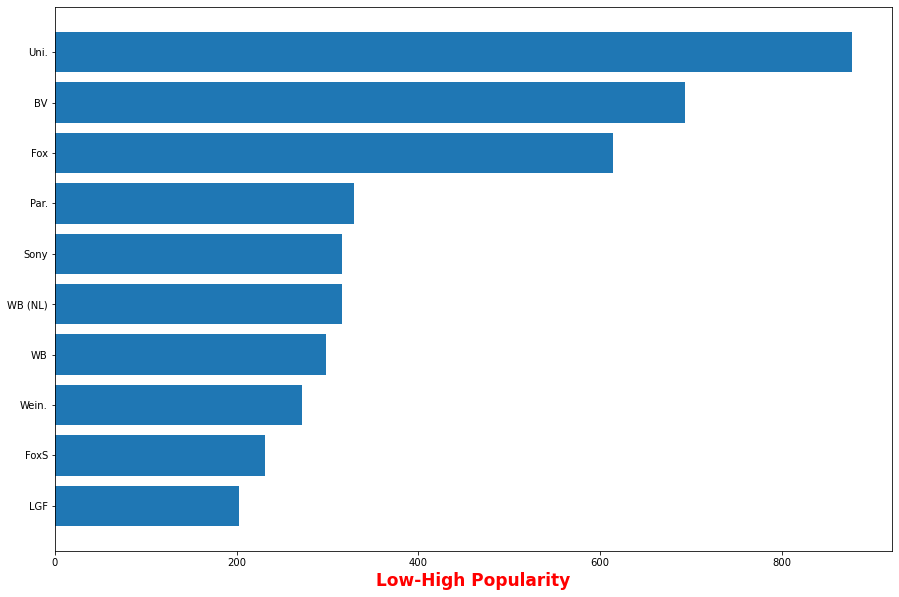

In [589]:
fig, ax = plt.subplots()
studios = top_10_per_studios.index
popularity = top_10_per_studios['popularity']
ax.invert_yaxis()
ax.barh(studios,popularity)
plt.xlabel('Low-High Popularity', fontweight='bold', color = 'Red', fontsize='17', horizontalalignment='center')
plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')
